In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
GRAPH_SAMPLE_SIZE = 1000

### Creating the Network Graph

In [3]:

# Load dataset as a graph
file_path = "facebook_edges.csv"
df = pd.read_csv(file_path)

# Read as an edge list
df = pd.read_csv(file_path, sep=" ", header=None, names=["source", "target"])

# Create an undirected graph
G = nx.Graph()
G.add_edges_from(df.values)

# Print basic details
print(f"Graph Loaded: Nodes = {G.number_of_nodes()}, Edges = {G.number_of_edges()}")


Graph Loaded: Nodes = 176470, Edges = 88235


In [4]:
def plot_subset_graph(G, sample_size=500):
    """
    Plots a sampled subgraph of the network to improve visualization speed.
    - G: The full graph
    - sample_size: Number of nodes to sample (default: 500)
    """
    fig, ax = plt.subplots(figsize=(10, 10))  # Fix: Use subplots

    # Sample a random subset of nodes
    sampled_nodes = random.sample(list(G.nodes), min(sample_size, len(G.nodes)))
    G_sample = G.subgraph(sampled_nodes)  # Extract the sampled subgraph

    # Draw the sampled graph
    nx.draw(G_sample, node_size=10, edge_color="gray", alpha=0.5, with_labels=False, ax=ax)

    ax.set_title(f"Sampled Graph Visualization ({sample_size} Nodes)")
    plt.show()

In [5]:
def plot_complete_graph(G):
    fig, ax = plt.subplots(figsize=(10, 10))  # Instead of plt.figure()
    # Draw the graph
    nx.draw(G, node_size=10, edge_color="gray", alpha=0.5, with_labels=False, ax=ax)
    # Show the plot
    plt.show()

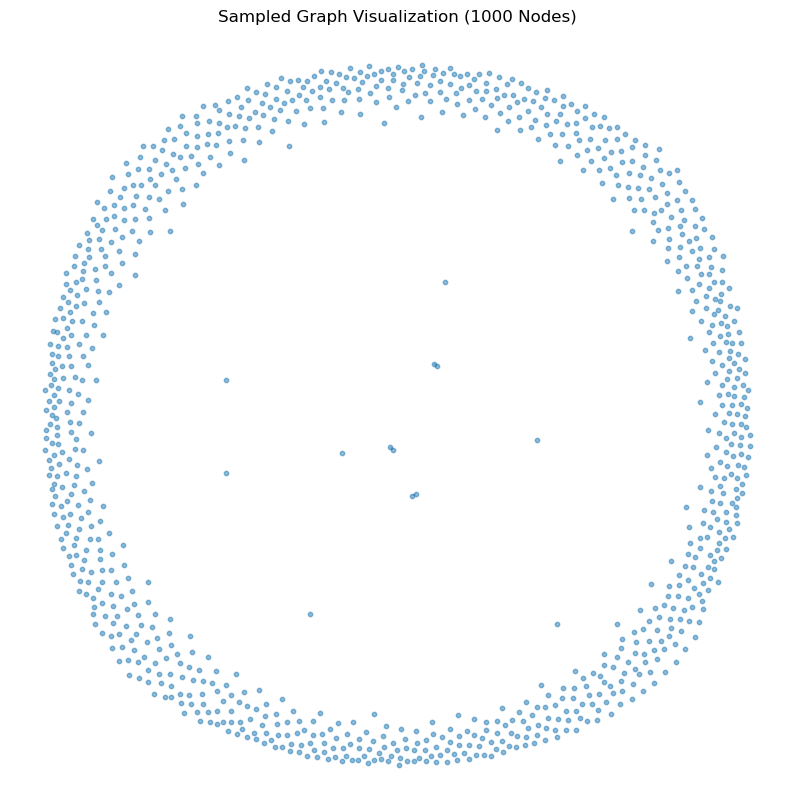

In [6]:
plot_subset_graph(G,1000)

In [7]:
print(plt) 

<module 'matplotlib.pyplot' from 'C:\\Users\\user\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>


### Analyzing PLT and PICV Model

In [8]:
import random

def plt_model(G, states, threshold=0.5):
    next_states = states.copy()
    for node in G.nodes:
        if states[node] == 'inactive':
            rumor_neighbors = sum(1 for neighbor in G.neighbors(node) if states[neighbor] == 'rumor')
            if rumor_neighbors / (G.degree(node) + 1) >= threshold:
                next_states[node] = 'rumor'
    return next_states


In [9]:
def picv_model(G, states, activation_prob=0.1):
    next_states = states.copy()
    for node in G.nodes:
        if states[node] == 'inactive':
            for neighbor in G.neighbors(node):
                if states[neighbor] == 'rumor' and random.random() < activation_prob:
                    next_states[node] = 'rumor'
                    break
    return next_states


### Compare Directed vs. Undirected Networks

In [10]:
## Convert the graph to directed graph
G_directed = nx.DiGraph()
G_directed.add_edges_from(G.edges())  # Treat edges as one-way connections


### Run PLT And PICV Model

In [11]:
# Initialize inactive nodes
states = {node: 'inactive' for node in G.nodes}
seed_nodes = random.sample(list(G.nodes), 10)  # Randomly select seed nodes

for node in seed_nodes:
    states[node] = 'rumor'

# Run models
plt_undirected = plt_model(G, states)
plt_directed = plt_model(G_directed, states)

picv_undirected = picv_model(G, states)
picv_directed = picv_model(G_directed, states)

# Compare results
print(f"Rumor spread in Undirected Graph (PLT): {sum(1 for v in plt_undirected.values() if v == 'rumor')}")
print(f"Rumor spread in Directed Graph (PLT): {sum(1 for v in plt_directed.values() if v == 'rumor')}")

print(f"Rumor spread in Undirected Graph (PICV): {sum(1 for v in picv_undirected.values() if v == 'rumor')}")
print(f"Rumor spread in Directed Graph (PICV): {sum(1 for v in picv_directed.values() if v == 'rumor')}")


Rumor spread in Undirected Graph (PLT): 20
Rumor spread in Directed Graph (PLT): 16
Rumor spread in Undirected Graph (PICV): 11
Rumor spread in Directed Graph (PICV): 10


In [12]:
def plot_rumor_spread_complete(G, states, title):
    fig, ax = plt.subplots(figsize=(10, 10))  # Instead of plt.figure()

    # Assign colors: 'red' for rumor, 'blue' for inactive
    node_colors = ['red' if states[node] == 'rumor' else 'blue' for node in G.nodes]

    # Draw the graph
    nx.draw(G, node_color=node_colors, node_size=50, edge_color="gray", alpha=0.5, with_labels=False, ax=ax)
    ax.set_title(title)  # Set title using ax
    plt.show()

In [13]:
def plot_rumor_spread_subset(G, states, title, sample_size=500):
    """
    Plots rumor spread in a smaller subgraph for faster visualization.
    """
    fig, ax = plt.subplots(figsize=(10, 10))  # Fix: Use subplots to avoid conflicts

    # Select a random sample of nodes
    sampled_nodes = random.sample(list(G.nodes), min(sample_size, len(G.nodes)))
    G_sample = G.subgraph(sampled_nodes)

    # Assign colors: 'red' for rumor, 'blue' for inactive
    node_colors = ['red' if states[node] == 'rumor' else 'blue' for node in G_sample.nodes]

    # Draw the smaller subgraph
    nx.draw(G_sample, node_color=node_colors, node_size=30, edge_color="gray", alpha=0.5, with_labels=False, ax=ax)
    ax.set_title(title)  # Fix: Use ax.set_title instead of plt.title
    plt.show()

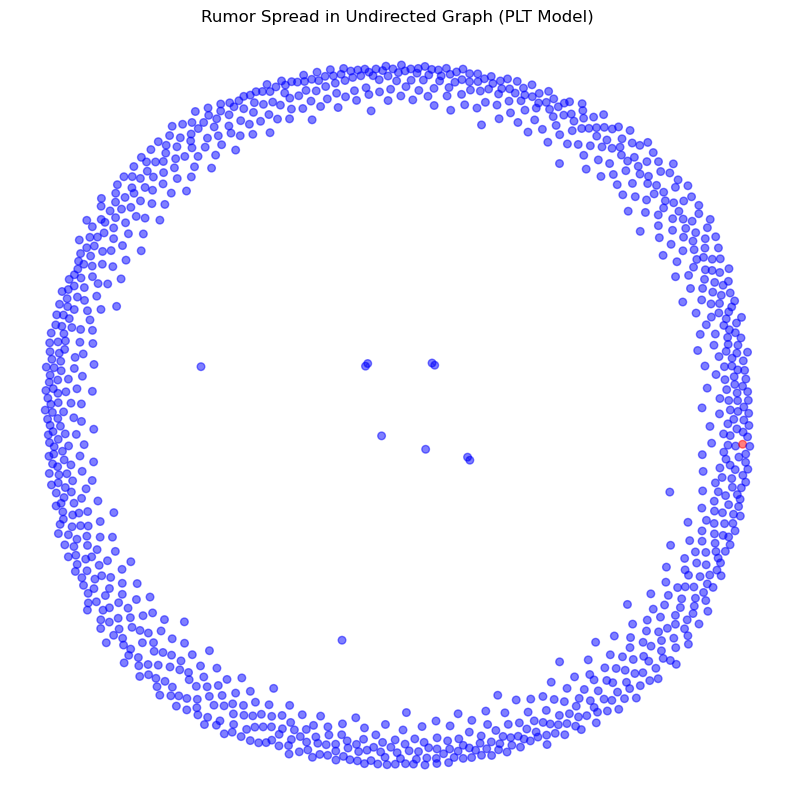

In [14]:
# Plot the graphs for PLT and PICV models
plot_rumor_spread_subset(G, plt_undirected, "Rumor Spread in Undirected Graph (PLT Model)",sample_size=GRAPH_SAMPLE_SIZE)


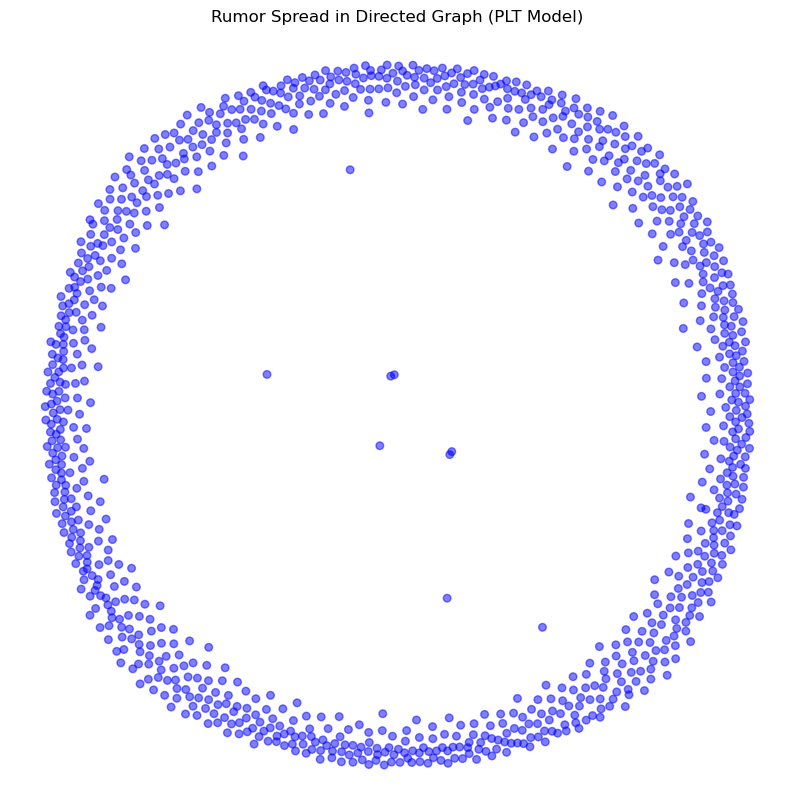

In [15]:
plot_rumor_spread_subset(G, plt_directed, "Rumor Spread in Directed Graph (PLT Model)",sample_size=GRAPH_SAMPLE_SIZE)


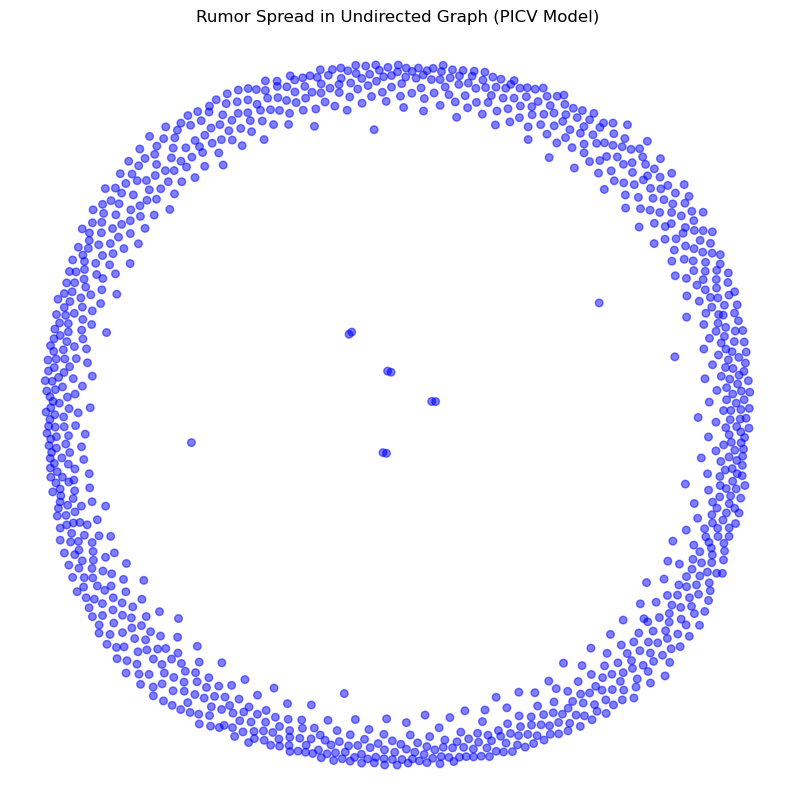

In [16]:
plot_rumor_spread_subset(G, picv_undirected, "Rumor Spread in Undirected Graph (PICV Model)",sample_size=GRAPH_SAMPLE_SIZE)

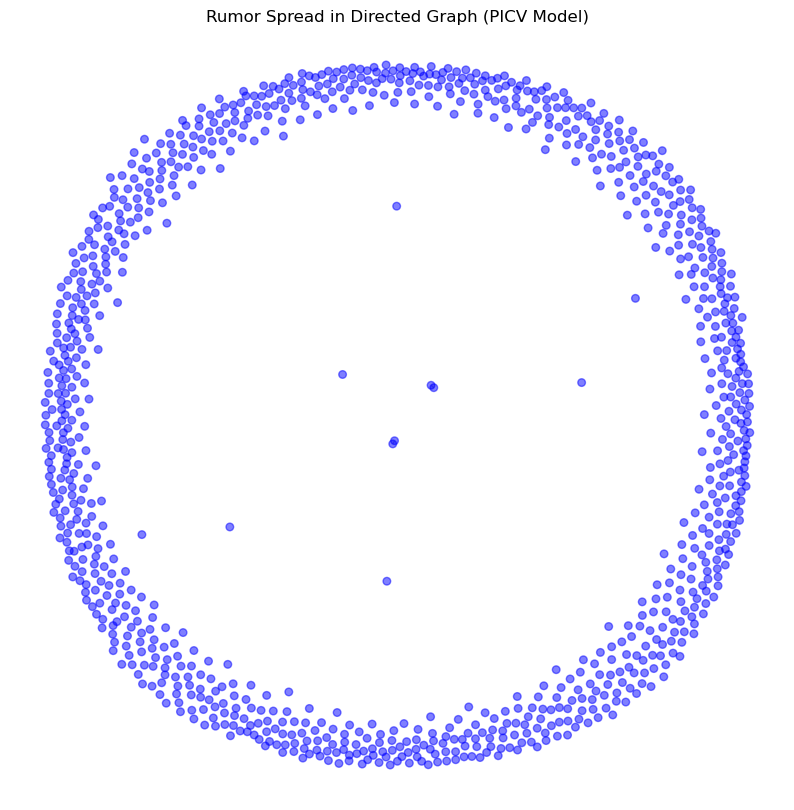

In [17]:
plot_rumor_spread_subset(G, picv_directed, "Rumor Spread in Directed Graph (PICV Model)",sample_size=GRAPH_SAMPLE_SIZE)

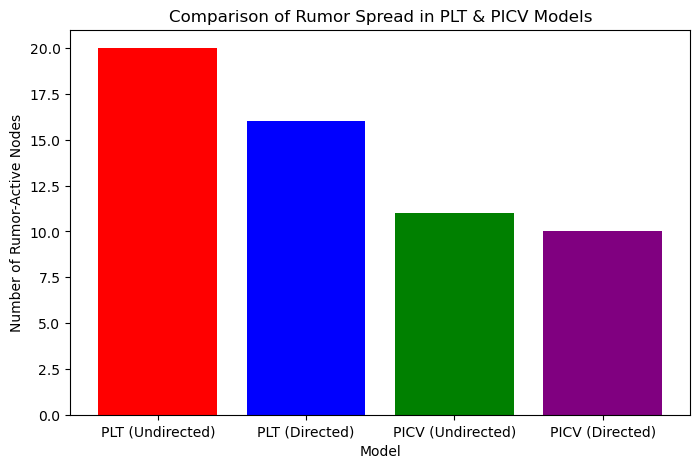

In [18]:
# Collect results
models = ["PLT (Undirected)", "PLT (Directed)", "PICV (Undirected)", "PICV (Directed)"]
rumor_counts = [
    sum(1 for v in plt_undirected.values() if v == 'rumor'),
    sum(1 for v in plt_directed.values() if v == 'rumor'),
    sum(1 for v in picv_undirected.values() if v == 'rumor'),
    sum(1 for v in picv_directed.values() if v == 'rumor')
]

# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(models, rumor_counts, color=["red", "blue", "green", "purple"])
plt.xlabel("Model")
plt.ylabel("Number of Rumor-Active Nodes")
plt.title("Comparison of Rumor Spread in PLT & PICV Models")
plt.show()

### Degree Distribution



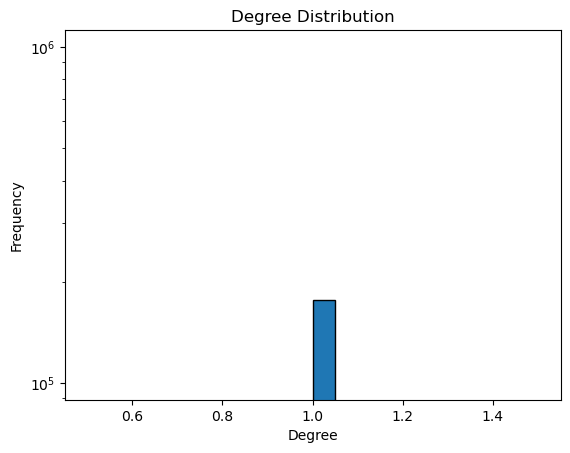

In [19]:
# Compute degree distribution
degrees = [deg for _, deg in G.degree()]
plt.hist(degrees, bins=20, edgecolor="black")

# Plot settings
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.yscale("log")
plt.show()


### Clustering Coefficient

In [20]:
avg_clustering = nx.average_clustering(G)
print(f"Average Clustering Coefficient: {avg_clustering:.4f}")


Average Clustering Coefficient: 0.0000


### Centrality Analysis (Most Influential Nodes)

In [21]:
degree_centrality = nx.degree_centrality(G)
most_influential = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 Most Influential Nodes:", most_influential)
top_nodes = [node for node, _ in most_influential]  # Extract node IDs

Top 10 Most Influential Nodes: [('source,target', 5.666717667125671e-06), (nan, 5.666717667125671e-06), ('0,1', 5.666717667125671e-06), (nan, 5.666717667125671e-06), ('0,2', 5.666717667125671e-06), (nan, 5.666717667125671e-06), ('0,3', 5.666717667125671e-06), (nan, 5.666717667125671e-06), ('0,4', 5.666717667125671e-06), (nan, 5.666717667125671e-06)]


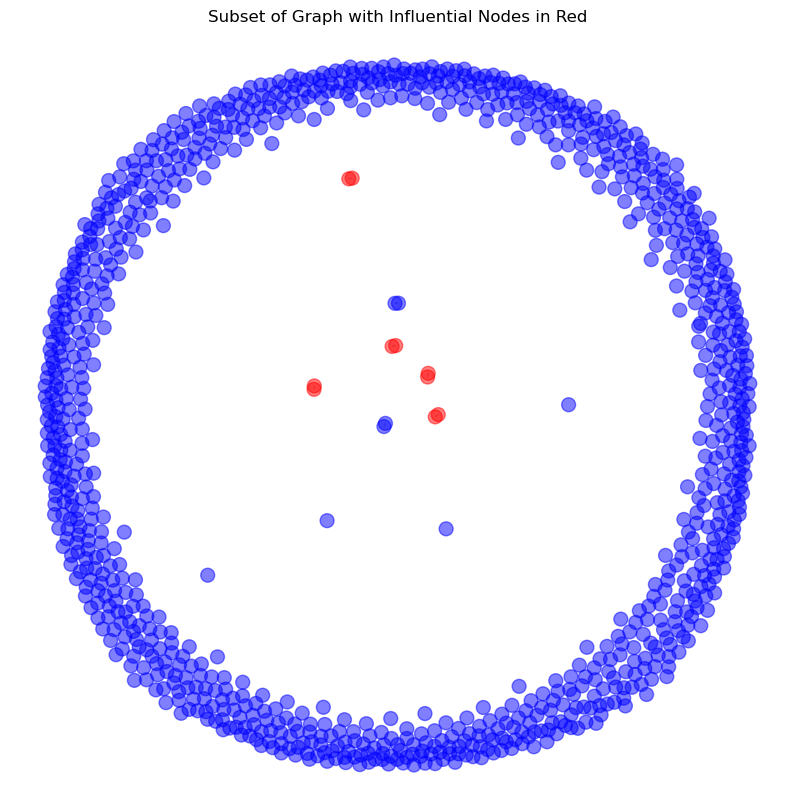

In [22]:
# Sample a subset of nodes from the graph (including influential nodes)
sampled_nodes = set(random.sample(list(G.nodes), min(GRAPH_SAMPLE_SIZE, len(G.nodes))))
sampled_nodes.update(top_nodes)  # Ensure influential nodes are included

# Create a subgraph
G_sample = G.subgraph(sampled_nodes)

# Define node colors: Red for influential nodes, blue for others
node_colors = ['red' if node in top_nodes else 'blue' for node in G_sample.nodes]

# Plot the subgraph
fig, ax = plt.subplots(figsize=(10, 10))
nx.draw(G_sample, node_size=100, node_color=node_colors, edge_color="gray", alpha=0.5, with_labels=False, ax=ax)
ax.set_title("Subset of Graph with Influential Nodes in Red")
plt.show()
